<a href="https://colab.research.google.com/github/MrCarry123/OrganSegmentation/blob/main/SplicingDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import numpy as np
!pip install SimpleITK
from skimage.transform import resize
import matplotlib.pyplot as plt
import os
import SimpleITK as sitk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
#Runs on gpu if gpu is available, else run on cpu

In [ ]:
# Load CamVid dataset
transform = transforms.Compose([
    transforms.Resize((572, 572)),

    transforms.RandomHorizontalFlip(), #Flips image horizontally. Make sure this is before you convert to tensors and normalize
    transforms.RandomVerticalFlip(),
    #This is for grayscale images
    transforms.RandomRotation(30),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])

    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    #This is for RGB images
])

In [ ]:
import os #Operating system
from glob import glob #Picks up files as lists

#Extract all image file names and label file names and put them into their lists (i.e., image_paths and label_paths)
def read_train_files(image_folder, label_folder):
    image_paths = []
    label_paths = []

    for image_file in sorted(glob(os.path.join(image_folder, '*.png'))):
        image_paths.append(image_file)
        label_file = os.path.join(label_folder, os.path.splitext(os.path.basename(image_file))[0]+'_L.png')
        label_paths.append(label_file)

    return image_paths, label_paths

In [ ]:
train_images_folder = '/content/drive/MyDrive/OrganSegmentation/OrganSegmentationImages'
train_labels_folder = '/content/drive/MyDrive/OrganSegmentation/OrganSegmentationLabels'

#train_image_paths, train_label_paths = read_train_files(train_image_folder, train_label_folder)
#print(train_image_paths)
#print(train_image_paths.head())
#print(train_image_folder.head())
#Combine em to one dataset
#train_dataset = CamVid(train_image_paths, train_label_paths)
#batch_size = 1
#train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
#This finds the depth among all the images, and this is the number of slices for each image

# Replace 'dataset_path' with the path to the folder containing your image dataset on Google Drive
dataset_path = '/content/drive/MyDrive/OrganSegmentation/OrganSegmentationImages'
gz_image_files = [file_name for file_name in os.listdir(dataset_path) if file_name.lower().endswith('.gz')]
min_depth = float('inf')
max_depth = float('-inf')
total_depth = 0
image_count = 0

# Loop through each .gz image and find its dimensions
for file_name in gz_image_files:
    image_path = os.path.join(dataset_path, file_name)

    # Load the 3D image
    image = sitk.ReadImage(image_path)

    # Get the dimensions of the 3D image
    width, height, depth = image.GetSize()
    if depth < min_depth:
        min_depth = depth
    if depth > max_depth:
        max_depth = depth

    # Accumulate depth for average calculation
    total_depth += depth
    image_count += 1

    # Print the dimensions of the 3D image for each file
    print(f"Image file: {file_name}, Dimensions: Width={width}, Height={height}, Depth={depth}")

# Calculate average depth
average_depth = total_depth / image_count

print(f"Minimum depth is {min_depth}")
print(f"Maximum depth is {max_depth}")
print(f"Average depth is {average_depth}")

Image file: volume-16.nii.gz, Dimensions: Width=512, Height=512, Depth=689
Image file: volume-15.nii.gz, Dimensions: Width=512, Height=512, Depth=565
Image file: volume-14.nii.gz, Dimensions: Width=512, Height=512, Depth=588
Image file: volume-139.nii.gz, Dimensions: Width=512, Height=512, Depth=552
Image file: volume-138.nii.gz, Dimensions: Width=512, Height=512, Depth=685
Image file: volume-137.nii.gz, Dimensions: Width=512, Height=512, Depth=707
Image file: volume-136.nii.gz, Dimensions: Width=512, Height=512, Depth=560
Image file: volume-135.nii.gz, Dimensions: Width=512, Height=512, Depth=540
Image file: volume-134.nii.gz, Dimensions: Width=512, Height=512, Depth=547
Image file: volume-133.nii.gz, Dimensions: Width=512, Height=512, Depth=299
Image file: volume-132.nii.gz, Dimensions: Width=512, Height=512, Depth=299
Image file: volume-131.nii.gz, Dimensions: Width=512, Height=512, Depth=687
Image file: volume-130.nii.gz, Dimensions: Width=512, Height=512, Depth=624
Image file: vol

File: volume-16.nii.gz


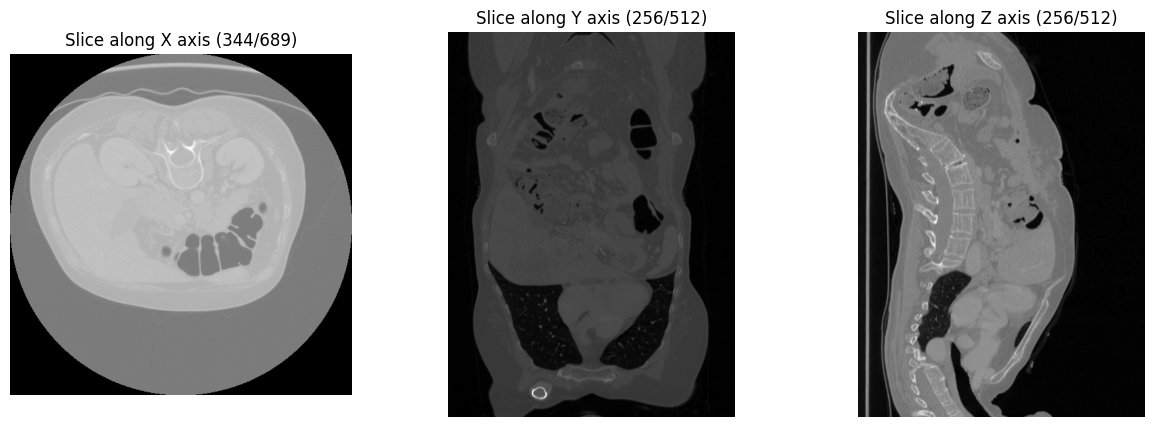

Size of X-axis view: Width=689, Height=512
Size of Y-axis view: Width=512, Height=512
Size of Z-axis view: Width=512, Height=512



KeyboardInterrupt: ignored

In [ ]:
#This prints all the images and all 3 views

dataset_path = '/content/drive/MyDrive/OrganSegmentation/OrganSegmentationImages'
gz_image_files = [file_name for file_name in os.listdir(dataset_path) if file_name.lower().endswith('.gz')]

# Function to display 2D slices along different axes
def display_slices(image_array):
    # Define the number of slices you want to visualize along each axis (X, Y, Z)
    num_slices_x = image_array.shape[0] // 2
    num_slices_y = image_array.shape[1] // 2
    num_slices_z = image_array.shape[2] // 2

    # Create subplots for each axis
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot slices along the X axis
    axes[0].imshow(image_array[num_slices_x, :, :], cmap='gray')
    axes[0].set_title(f"Slice along X axis ({num_slices_x}/{image_array.shape[0]})")
    axes[0].axis('off')

    # Plot slices along the Y axis
    axes[1].imshow(image_array[:, num_slices_y, :], cmap='gray')
    axes[1].set_title(f"Slice along Y axis ({num_slices_y}/{image_array.shape[1]})")
    axes[1].axis('off')

    # Plot slices along the Z axis
    axes[2].imshow(image_array[:, :, num_slices_z], cmap='gray')
    axes[2].set_title(f"Slice along Z axis ({num_slices_z}/{image_array.shape[2]})")
    axes[2].axis('off')

    # Show the plot
    plt.show()

    # Return the size of each view
    return image_array.shape[1], image_array.shape[0]

# Loop through each .gz image and display slices
for file_name in gz_image_files:
    image_path = os.path.join(dataset_path, file_name)

    # Load the 3D image
    image = sitk.ReadImage(image_path)

    # Convert the SimpleITK image to a NumPy array
    image_array = sitk.GetArrayFromImage(image)
    print(f"File: {file_name}")
    # Display 2D slices along different axes and get the view sizes
    slice_height_x, slice_width_x = display_slices(image_array)

    # Print the size of each image view
    print(f"Size of X-axis view: Width={slice_width_x}, Height={slice_height_x}")
    print(f"Size of Y-axis view: Width={image_array.shape[2]}, Height={slice_height_x}")
    print(f"Size of Z-axis view: Width={image_array.shape[2]}, Height={image_array.shape[1]}")
    print()

In [ ]:
image_path = '/content/drive/MyDrive/OrganSegmentation/OrganSegmentationLabels/labels-16.nii.gz'

# Load the 3D image
image = sitk.ReadImage(image_path)

# Convert the SimpleITK image to a NumPy array
image_array = sitk.GetArrayFromImage(image)

# Get the dimensions of the 3D image
width, height, depth = image.GetSize()
aspect_ratio = 1.0  # Set aspect ratio to 1 to make both sides equal
print(height)

# Display 2D slices along the Z-axis (depth) in a grid
num_slices = height
num_cols = 6  # Number of columns in the grid
num_rows = (num_slices + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Increase the figure size to make the displayed images bigger
plt.figure(figsize=(num_cols * 4, num_rows * 4 * aspect_ratio))

for slice_index in range(num_slices):
    # Extract the 2D slice along the y-axis
    slice_2d = image_array[:, slice_index, :]
    height_slice, width_slice = slice_2d.shape
    # Display the 2D slice in the grid
    plt.subplot(num_rows, num_cols, slice_index + 1)
    plt.imshow(slice_2d, cmap='gray', aspect='auto')  # Set aspect ratio to 'auto'
    plt.text(0.5, -0.1, f'Height: {height_slice}, Width: {width_slice}', transform=plt.gca().transAxes,
             horizontalalignment='center', verticalalignment='center', fontsize=10, color='red')
plt.axis("off")
plt.show()

512


In [ ]:
import os
import matplotlib.pyplot as plt
import SimpleITK as sitk

input_folder = '/content/drive/MyDrive/OrganSegmentation/OrganSegmentationLabels'
output_folder = '/content/drive/MyDrive/Organsegmentation2/Labels'

# Get the list of all .nii.gz files in the input folder
gz_image_files = [file_name for file_name in os.listdir(input_folder) if file_name.lower().endswith('.nii.gz')]

# Function to save 2D slices to files
def save_slices_to_files(volume_name, image_array, output_folder):
    # Get the dimensions of the 3D image
    depth, height, width = image_array.shape
    aspect_ratio = 1.0  # Set aspect ratio to 1 to make both sides equal

    # Display 2D slices along the Z-axis (depth) in a grid
    num_slices = height
    num_cols = 6  # Number of columns in the grid
    num_rows = (num_slices + num_cols - 1) // num_cols  # Calculate the number of rows needed

    # Increase the figure size to make the displayed images bigger
    plt.figure(figsize=(num_cols * 4, num_rows * 4 * aspect_ratio))

    for slice_index in range(num_slices):
        # Extract the 2D slice along the y-axis
        slice_2d = image_array[:, slice_index, :]
        height_slice, width_slice = slice_2d.shape
        # Display the 2D slice in the grid
        plt.subplot(num_rows, num_cols, slice_index + 1)
        plt.imshow(slice_2d, cmap='gray', aspect='auto')  # Set aspect ratio to 'auto'
        plt.axis("off")

        # Save the slice to a file
        output_file = os.path.join(output_folder, f'{volume_name}_slice_{slice_index}.png')
        plt.savefig(output_file, bbox_inches='tight')
        plt.clf()  # Clear the plot for the next slice

        # Print the file name of the saved slice
        print(f"Saved {output_file}")

# List to store volume names with slice 0 saved
saved_volume_list = []

# Loop through each .nii.gz image and check if slice 0 is saved
for file_name in gz_image_files:
    # Get the volume name without the extension
    volume_name = os.path.splitext(file_name)[0]

    # Check if slice 0 is saved for the current volume image
    output_file = os.path.join(output_folder, f'{volume_name}_slice_0.png')
    if os.path.exists(output_file):
        saved_volume_list.append(volume_name)
        print(f"Volume image {volume_name} has been saved.")
    else:
        # Load the 3D image
        image_path = os.path.join(input_folder, file_name)
        image = sitk.ReadImage(image_path)

        # Convert the SimpleITK image to a NumPy array
        image_array = sitk.GetArrayFromImage(image)

        # Save the 2D slices to files
        save_slices_to_files(volume_name, image_array, output_folder)

print("Volume images with slice 0 saved:")
print(saved_volume_list)


Volume image labels-28.nii has been saved.
Volume image labels-29.nii has been saved.
Volume image labels-27.nii has been saved.
Volume image labels-26.nii has been saved.
Volume image labels-24.nii has been saved.
Volume image labels-25.nii has been saved.
Volume image labels-23.nii has been saved.
Volume image labels-22.nii has been saved.
Volume image labels-21.nii has been saved.
Volume image labels-2.nii has been saved.
Volume image labels-20.nii has been saved.
Volume image labels-19.nii has been saved.
Volume image labels-18.nii has been saved.
Volume image labels-17.nii has been saved.
Volume image labels-16.nii has been saved.
Volume image labels-14.nii has been saved.
Volume image labels-15.nii has been saved.
Volume image labels-139.nii has been saved.
Volume image labels-138.nii has been saved.
Volume image labels-137.nii has been saved.
Volume image labels-136.nii has been saved.
Volume image labels-134.nii has been saved.
Volume image labels-135.nii has been saved.
Volume

In [ ]:
import os

def search_image_file(target_file_name, search_path):
    found_files = []

    for root, _, files in os.walk(search_path):
        for file_name in files:
            if file_name.lower() == target_file_name.lower():
                found_files.append(os.path.join(root, file_name))

    return found_files

# Set the target image file name you want to search for
target_image_file = 'volume-53.nii_slice_328.png'

# Set the directory where you want to start the search (e.g., the root directory of your drive)
search_directory = '/content/drive/MyDrive/OrganSegmentation2'

# Perform the search
results = search_image_file(target_image_file, search_directory)

# Print the results
if results:
    print(f"Found {target_image_file} at the following locations:")
    for path in results:
        print(path)
else:
    print(f"{target_image_file} not found in the specified directory and its subdirectories.")

In [ ]:

# Path to the folder where you want to save the training and testing data
train_images_folder = '/content/drive/MyDrive/Organsegmentation2/train_images'
train_labels_folder = '/content/drive/MyDrive/Organsegmentation2/train_labels'
test_images_folder = '/content/drive/MyDrive/Organsegmentation2/test_images'
test_labels_folder = '/content/drive/MyDrive/Organsegmentation2/test_labels'

for volume_name in train_volumes:
    for image_file, label_file in volume_images[volume_name]:
        image_src_path = os.path.join(images_folder, image_file)
        image_dst_path = os.path.join(train_images_folder, image_file)
        shutil.move(image_src_path, image_dst_path)

        label_src_path = os.path.join(labels_folder, label_file)
        label_dst_path = os.path.join(train_labels_folder, label_file)
        shutil.move(label_src_path, label_dst_path)
        print(f"Moving {image_file} to {train_images_folder}")
        print(f"Moving {label_file} to {train_labels_folder}")
for volume_name in test_volumes:
    for image_file, label_file in volume_images[volume_name]:
        image_src_path = os.path.join(images_folder, image_file)
        image_dst_path = os.path.join(test_images_folder, image_file)
        shutil.move(image_src_path, image_dst_path)

        label_src_path = os.path.join(labels_folder, label_file)
        label_dst_path = os.path.join(test_labels_folder, label_file)
        shutil.move(label_src_path, label_dst_path)
        print(f"Moving {image_file} to {test_images_folder}")
        print(f"Moving {label_file} to {test_labels_folder}")

# Move the selected volumes to the training folders


# Move the remaining volumes to the testing folders


In [ ]:
import os
import shutil
import random
from collections import defaultdict

# Set the seed for reproducibility (optional)
random.seed(42)

# Path to the folder containing your images and labels
images_folder = '/content/drive/MyDrive/OrganSegmentation/OrganSegmentation_2DImages'
labels_folder = '/content/drive/MyDrive/OrganSegmentation/OrganSegmentation_2DLabels'

# Get the list of image and label file names and sort them alphabetically
image_list = sorted(os.listdir(images_folder))
label_list = sorted(os.listdir(labels_folder))

# Create a dictionary to group images and labels by volume
volume_images = defaultdict(list)
for image_file, label_file in zip(image_list, label_list):
    volume_name = image_file.split('_slice_')[0]  # Assuming the volume name is before '_slice_'
    volume_images[volume_name].append((image_file, label_file))

# Sort the volumes alphabetically
volume_list = sorted(list(volume_images.keys()))

# Shuffle the volumes (if needed)
random.shuffle(volume_list)

# Calculate the number of volumes for training and testing
total_volumes = len(volume_list)
num_train_volumes = int(0.75 * total_volumes)
num_test_volumes = total_volumes - num_train_volumes

# Randomly select volumes for training and testing
train_volumes = volume_list[:num_train_volumes]
test_volumes = volume_list[num_train_volumes:]

# Continue with the rest of your code for copying the files to training and testing folders
# ...


In [ ]:
import os
import shutil
import random
from collections import defaultdict

# Set the seed for reproducibility (optional)
random.seed(42)

# Path to the folder containing your images and labels
images_folder = '/content/drive/MyDrive/OrganSegmentation/OrganSegmentation_2DImages'
labels_folder = '/content/drive/MyDrive/OrganSegmentation/OrganSegmentation_2DLabels'

# Get the list of image and label file names and sort them alphabetically
image_list = sorted(os.listdir(images_folder))
label_list = sorted(os.listdir(labels_folder))

# Create a dictionary to group images and labels by volume
volume_images = defaultdict(list)
for image_file, label_file in zip(image_list, label_list):
    volume_name = image_file.split('_slice_')[0]  # Assuming the volume name is before '_slice_'
    volume_images[volume_name].append((image_file, label_file))

# Shuffle the volumes
volume_list = list(volume_images.keys())
random.shuffle(volume_list)

# Create a copy of the volumes' image and label lists
train_images_list = []
train_labels_list = []
test_images_list = []
test_labels_list = []

# Calculate the number of volumes for training and testing
total_volumes = len(volume_list)
num_train_volumes = int(0.75 * total_volumes)
num_test_volumes = total_volumes - num_train_volumes

# Randomly select volumes for training and testing
train_volumes = volume_list[:num_train_volumes]
test_volumes = volume_list[num_train_volumes:]

# Function to move files back to their original locations
def move_files_back(file_list, src_folder, dst_folder):
    for file_name in file_list:
        src_path = os.path.join(dst_folder, file_name)
        dst_path = os.path.join(src_folder, file_name)
        shutil.move(src_path, dst_path)
        print(f"Moving {file_name} back to {src_folder}")

# Copy the selected volumes' images and labels to the training folders
for volume_name in train_volumes:
    for image_file, label_file in volume_images[volume_name]:
        image_src_path = os.path.join(images_folder, image_file)
        image_dst_path = os.path.join(train_images_folder, image_file)
        shutil.copy(image_src_path, image_dst_path)

        label_src_path = os.path.join(labels_folder, label_file)
        label_dst_path = os.path.join(train_labels_folder, label_file)
        shutil.copy(label_src_path, label_dst_path)
        print(f"Copying {image_file} to {train_images_folder}")
        print(f"Copying {label_file} to {train_labels_folder}")

        # Add image and label filenames to the train lists
        train_images_list.append(image_file)
        train_labels_list.append(label_file)

# Copy the remaining volumes' images and labels to the testing folders
for volume_name in test_volumes:
    for image_file, label_file in volume_images[volume_name]:
        image_src_path = os.path.join(images_folder, image_file)
        image_dst_path = os.path.join(test_images_folder, image_file)
        shutil.copy(image_src_path, image_dst_path)

        label_src_path = os.path.join(labels_folder, label_file)
        label_dst_path = os.path.join(test_labels_folder, label_file)
        shutil.copy(label_src_path, label_dst_path)
        print(f"Copying {image_file} to {test_images_folder}")
        print(f"Copying {label_file} to {test_labels_folder}")

        # Add image and label filenames to the test lists
        test_images_list.append(image_file)
        test_labels_list.append(label_file)

# Data split into training and testing sets while maintaining volumes.
print("Data split into training and testing sets while maintaining volumes.")

# Now you have the image and label filenames for training and testing in train_images_list, train_labels_list, test_images_list, and test_labels_list.

# Move the files back to their original locations
move_files_back(train_images_list, images_folder, train_images_folder)
move_files_back(train_labels_list, labels_folder, train_labels_folder)
move_files_back(test_images_list, images_folder, test_images_folder)
move_files_back(test_labels_list, labels_folder, test_labels_folder)

# Files moved back to their original locations.
print("Files moved back to their original locations.")


Data split into training and testing sets while maintaining volumes.
Files moved back to their original locations.


In [ ]:
import os

# Specify the path to the folder in your Google Drive
folder_path = '/content/drive/MyDrive/OrganSegmentation/OrganSegmentation_2DImages'

# Get the list of all files in the folder
file_list = os.listdir(folder_path)

# Count the number of files
num_files = len(file_list)

print(f"Number of files in the folder: {num_files}")

Number of files in the folder: 0


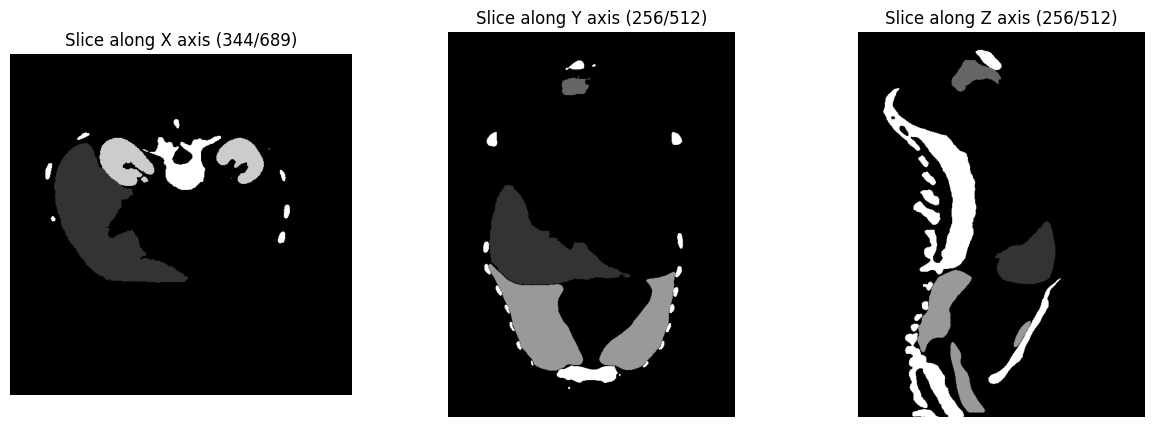

Size of X-axis view: Width=689, Height=512
Size of Y-axis view: Width=512, Height=512
Size of Z-axis view: Width=512, Height=512


In [ ]:
image_path = '/content/drive/MyDrive/OrganSegmentation/OrganSegmentationLabels/labels-16.nii.gz'

# Load the 3D image
image = sitk.ReadImage(image_path)

# Convert the SimpleITK image to a NumPy array
image_array = sitk.GetArrayFromImage(image)

# Display 2D slices along different axes
def display_slices(image_array):
    # Define the number of slices you want to visualize along each axis (X, Y, Z)
    num_slices_x = image_array.shape[0] // 2
    num_slices_y = image_array.shape[1] // 2
    num_slices_z = image_array.shape[2] // 2

    # Create subplots for each axis
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot slices along the X axis
    axes[0].imshow(image_array[num_slices_x, :, :], cmap='gray')
    axes[0].set_title(f"Slice along X axis ({num_slices_x}/{image_array.shape[0]})")
    axes[0].axis('off')

    # Plot slices along the Y axis
    axes[1].imshow(image_array[:, num_slices_y, :], cmap='gray')
    axes[1].set_title(f"Slice along Y axis ({num_slices_y}/{image_array.shape[1]})")
    axes[1].axis('off')

    # Plot slices along the Z axis
    axes[2].imshow(image_array[:, :, num_slices_z], cmap='gray')
    axes[2].set_title(f"Slice along Z axis ({num_slices_z}/{image_array.shape[2]})")
    axes[2].axis('off')

    # Show the plot
    plt.show()

    # Return the size of each view
    return image_array.shape[1], image_array.shape[0]

# Display 2D slices along different axes and get the view sizes
slice_height_x, slice_width_x = display_slices(image_array)

# Print the size of each image view
print(f"Size of X-axis view: Width={slice_width_x}, Height={slice_height_x}")
print(f"Size of Y-axis view: Width={image_array.shape[2]}, Height={slice_height_x}")
print(f"Size of Z-axis view: Width={image_array.shape[2]}, Height={image_array.shape[1]}")

In [ ]:
# Pre-processing for the  dataset because of the NIfTI-1 Data Format
# There is a dual file structure (images are in both .hdr & .img formats)

class CamVid(Dataset):
    def __init__(self, image_paths, label_paths, transform=None):
        self.image_paths = image_paths
        self.label_paths = label_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):

        image_path = self.image_paths[idx]
        label_path = self.label_paths[idx]

        image_data = Image.open(image_path)
        image_data = image_data.resize((128, 128))

        label_data = Image.open(label_path).convert('L')
        label_data = label_data.resize((128, 128))

        image_data = np.array(image_data)
        # Normalize the image array by dividing by 255.0
        image_data = image_data / 255.0

        # convert to Pytorch Tensors
        image_data = np.array(image_data, dtype=np.float64)
        image_tensor = torch.from_numpy(image_data).float()

        label_data = np.array(label_data, dtype=np.uint8)
        label_tensor = torch.from_numpy(label_data).float()


        return image_tensor, label_tensor

In [ ]:
for X,y in train_dataloader:
    X = X.to(device)
    y = y.to(device)

#

NameError: ignored